In order to better understand regulization of __Linear Regression__ I am going to compare 4 models from ScikitLearn :
- Linear Regression (not regularized)
- Linear Regression (manually regularized by optimizing of number of highly correlated features)
- Lasso Regression model (L1 regularization)
- Ridge Regression model (L2 regularization)
- Elastic Net Regression model (combination of L1 and L2)

The dataset to be used is __housing.csv__ from Kaggle.

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

As metrics I will use __MSE__ and __R2__ metrics.

https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_train = '.\\housing.csv'

In [3]:
df = pd.read_csv(path_train)

# Basic Analysis

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# EDA

In [7]:
df[['longitude', 'latitude']]

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


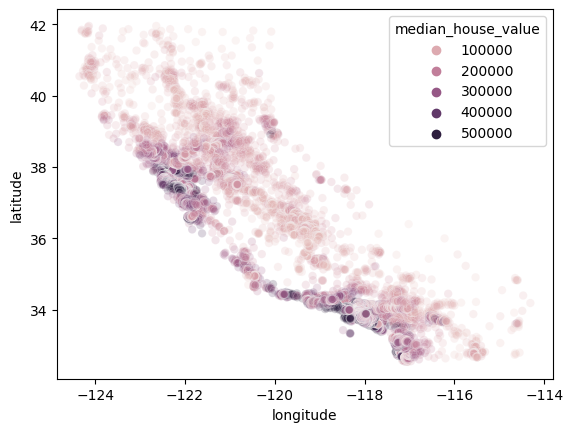

In [8]:
sns.scatterplot(data = df, x = 'longitude', y ='latitude', hue = 'median_house_value', alpha=0.2)

plt.show()

In [9]:
df[['longitude', 'latitude']].isna().value_counts()

longitude  latitude
False      False       20640
dtype: int64

In [10]:
df['housing_median_age']

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64

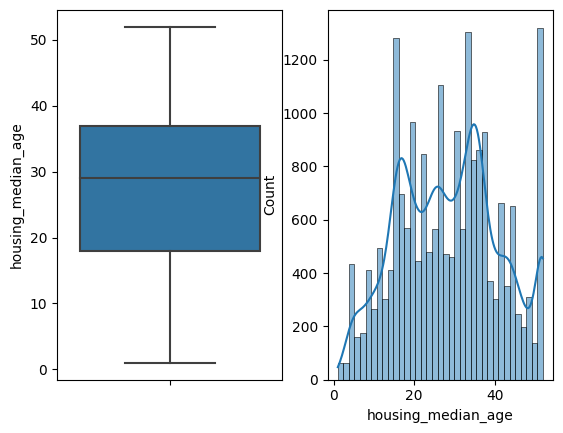

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'housing_median_age', ax=ax1)
sns.histplot(data = df, x='housing_median_age', kde = True, ax = ax2)

plt.show()

In [12]:
df['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

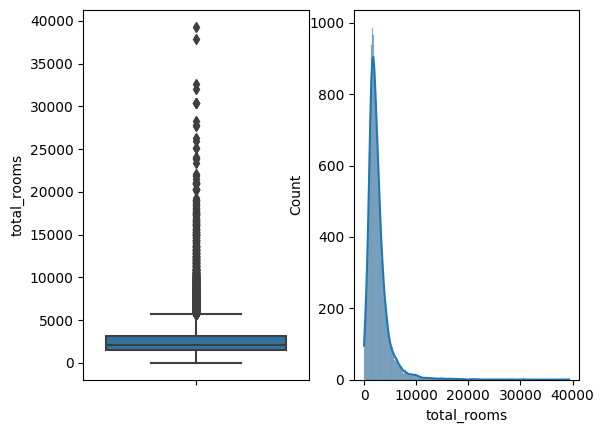

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'total_rooms', ax=ax1)
sns.histplot(data = df, x='total_rooms', kde = True, ax = ax2)

plt.show()

The data is pretty skewed with a lot of outliers. We would need to perform Power Transforms (either Box-Cos or Yeo-Johnson), nevertheless we can make it for more columns in dataset at once later on. 

In [14]:
df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

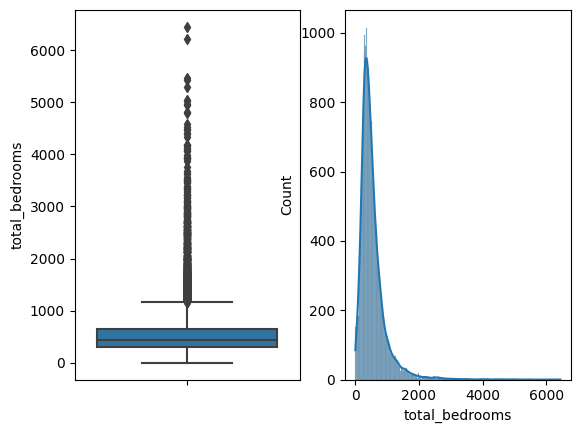

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'total_bedrooms', ax=ax1)
sns.histplot(data = df, x='total_bedrooms', kde = True, ax = ax2)

plt.show()

In [16]:
df['total_bedrooms'].isna().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

The very similar data like for total bedrooms. The data is pretty skewed with a lot of outliers. We would need to perform Power Transforms (either Box-Cos or Yeo-Johnson), as well, some data are missing so to use the other data we fill mean value instead.

In [17]:
df['population']

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

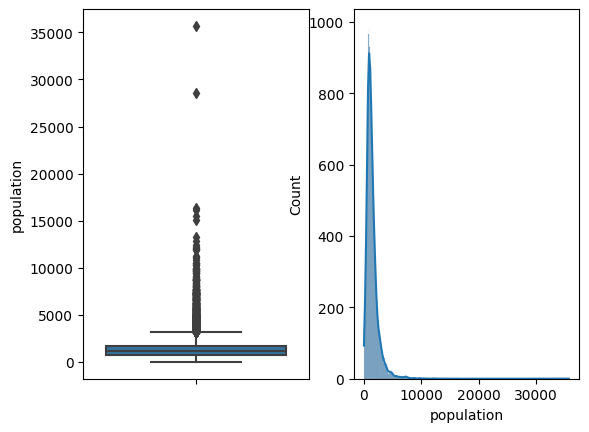

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'population', ax=ax1)
sns.histplot(data = df, x='population', kde = True, ax = ax2)

plt.show()

In [19]:
df['households']

0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 20640, dtype: float64

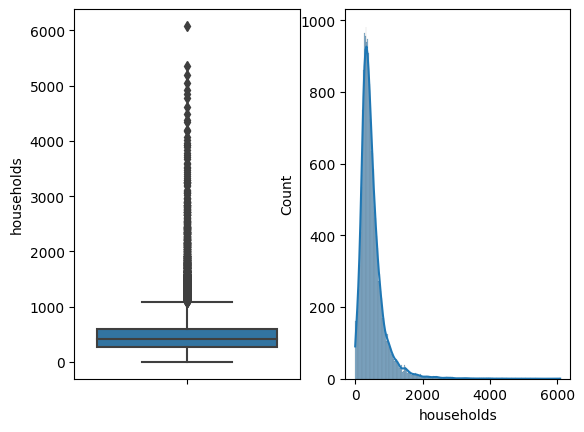

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'households', ax=ax1)
sns.histplot(data = df, x='households', kde = True, ax = ax2)

plt.show()

In [21]:
df['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

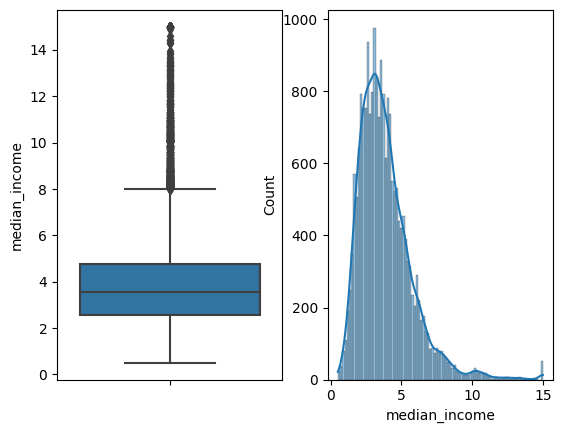

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'median_income', ax=ax1)
sns.histplot(data = df, x='median_income', kde = True, ax = ax2)

plt.show()

In [23]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

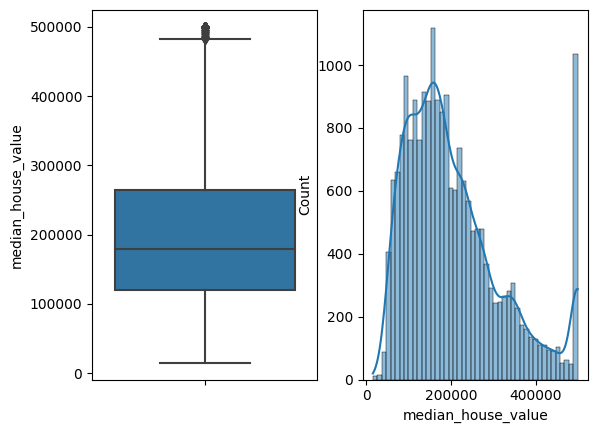

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.boxplot(data = df, y = 'median_house_value', ax=ax1)
sns.histplot(data = df, x='median_house_value', kde = True, ax = ax2)

plt.show()

In [25]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [26]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

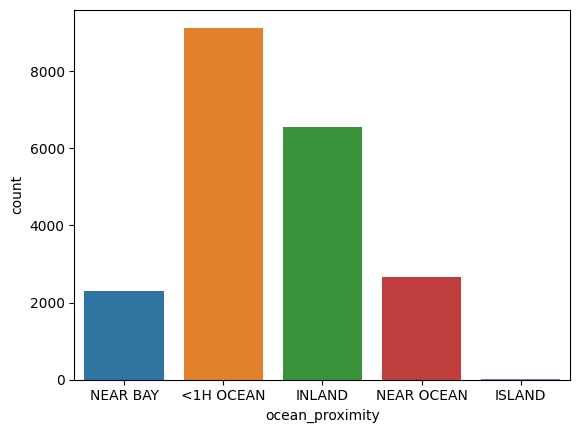

In [27]:
sns.countplot(data=df, x = 'ocean_proximity')

Data is categorical and describe the quality of feature NEAR-BAY the best and INLAND the worst, I will apply label encoder instead of one-hot encoding. 

# Data wrangling

Let's fix missing values in total_bedrooms feature.

In [28]:
df['total_bedrooms'].isna().value_counts().to_frame()

,total_bedrooms
False,20433
True,207


In [29]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True)

In [30]:
df['total_bedrooms'].isna().value_counts().to_frame()

,total_bedrooms
False,20640


Now let's apply label encoding for categorical feature ocean proximity. 

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
df['ocean_proximity'].value_counts().to_frame()

,ocean_proximity
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [33]:
label_encoder = LabelEncoder()

In [34]:
df['ocean_proximity_cat'] = label_encoder.fit_transform(df['ocean_proximity'])

In [35]:
df[['ocean_proximity', 'ocean_proximity_cat']].value_counts().to_frame()

,,0
ocean_proximity,ocean_proximity_cat,
<1H OCEAN,0,9136
INLAND,1,6551
NEAR OCEAN,4,2658
NEAR BAY,3,2290
ISLAND,2,5


We can see the dataset is quite skewed, so let's normalize data by means of Power Transformer and Yeo-Johnson transformation.

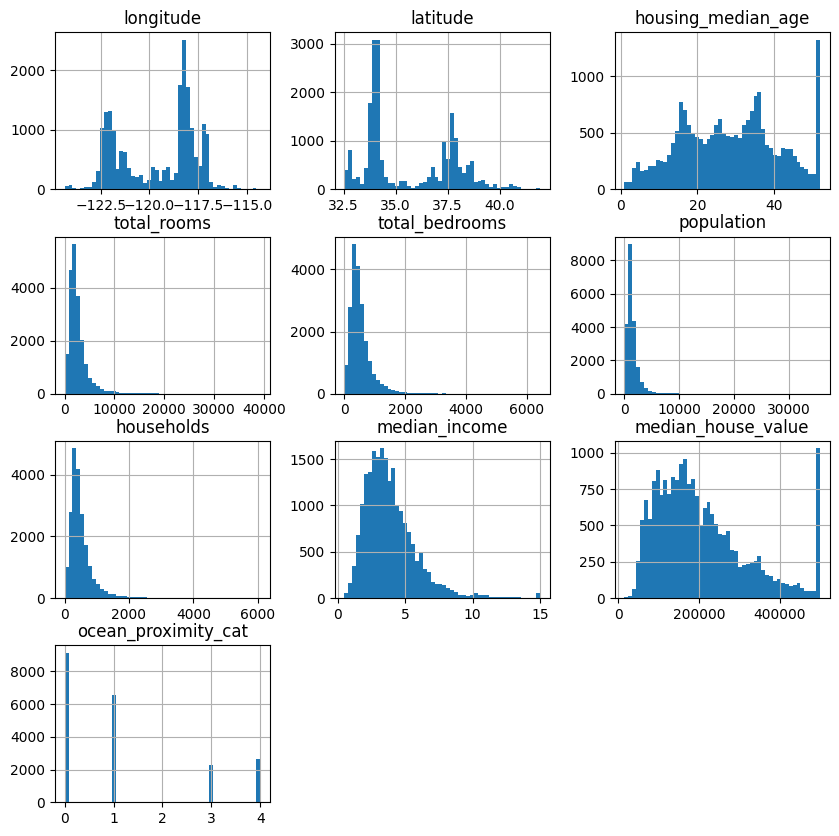

In [36]:
df.hist(bins = 50, figsize = (10,10))
plt.show()

In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


We are not going to normalize the categorical feature, so let's drop it and then concatenate.

In [38]:
df_to_transform = df.drop(labels=['ocean_proximity', 'ocean_proximity_cat'], axis=1)

In [39]:
df_transformed = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(df_to_transform)

In [40]:
df_transformed_pd = pd.DataFrame(df_transformed, columns = df_to_transform.columns)

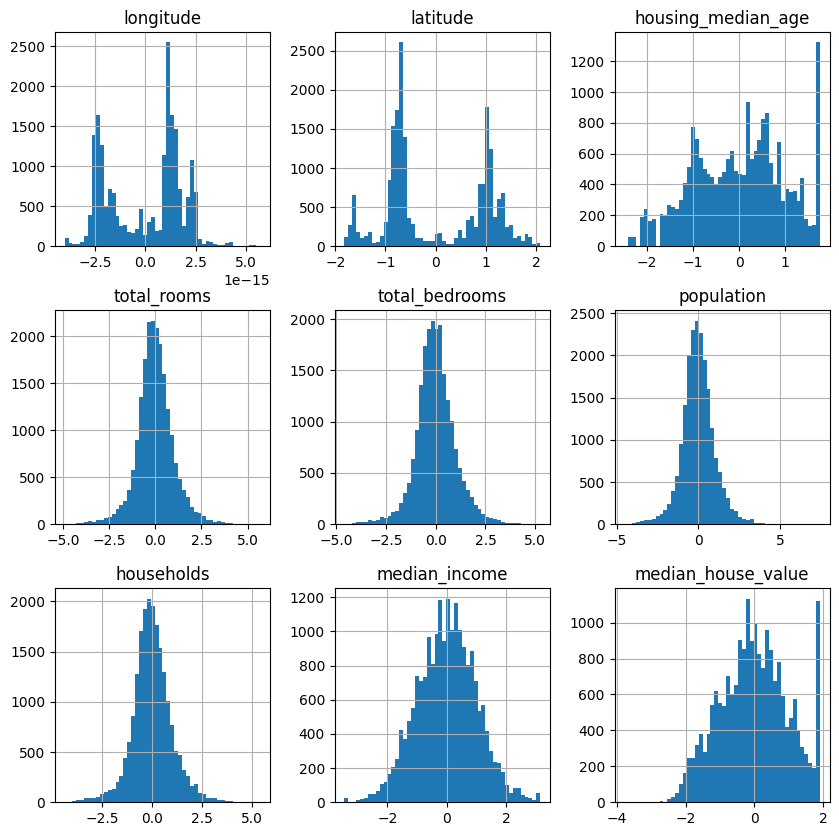

In [41]:
#df_transformed_pd = df_transformed_pd.join(df['ocean_proximity_cat'])
df_transformed_pd.hist(bins = 50, figsize = (10,10))
plt.show()

We have fixed skeweness of the data quite nice. Now let's prepare data for training and compare various algorithms. 

In [42]:
train, test = train_test_split(df_transformed_pd, test_size=0.2,random_state=0)

In [43]:
y_train = train['median_house_value']
X_train = train.drop("median_house_value", axis=1)

y_test = test['median_house_value']
X_test = test.drop('median_house_value', axis=1)

In [44]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [45]:
y_train.shape, y_test.shape

((16512,), (4128,))

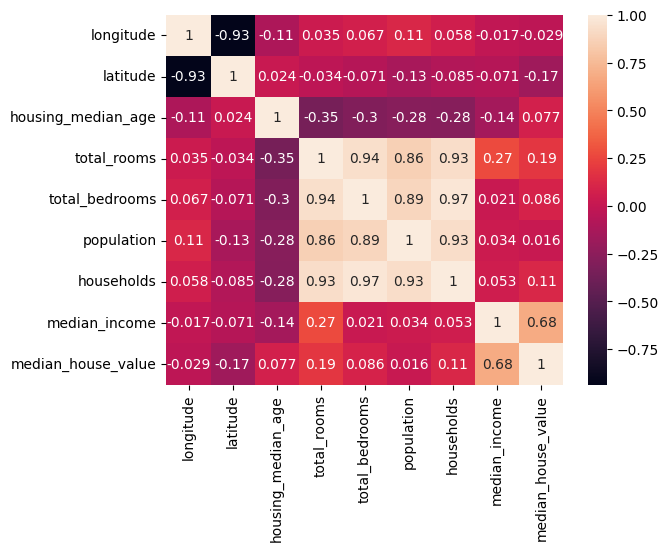

In [46]:
sns.heatmap(df_transformed_pd.corr(), annot = True)
plt.show()

# __Multi-collinearity__

Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard to interpret of model and also creates an overfitting problem. It is common practice to delete highly correlated features and if there are more keep the only one which is the most correlated to target value so thus we can manually regularize the data. 

From colleration diagram above, we can clearly see the multicollinearity for some features but to check overall dataset let's apply Variance Inflation Factor formula. 

As for correlated features, we basically can remove correlated features, change the feature into different one by calclulating a new one which can be interpretted and reveresed back, or simply keep them and see the results. 

I have decided just to remove some features and check the VIF - Variance Inflation Factor before and after. The value above 10 is usually considered as high correlated feature however can be accepted based on dataset. The values higher than 20 however should be managed. 

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(dataframe):

    vif = pd.DataFrame()
    vif["features"] = dataframe.columns
    vif["vif_Factor"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    
    return vif

In [64]:
get_vif(df_transformed_pd)

,features,vif_Factor
0,longitude,13.204976
1,latitude,1.117692
2,housing_median_age,1.245161
3,total_rooms,19.139005
4,total_bedrooms,28.898028
5,population,8.109671
6,households,29.420687
7,median_income,3.884016
8,median_house_value,2.457837


In [87]:
df_to_be_dropped = ['total_bedrooms', 'population', 'households']

In [88]:
df_dropped = df_transformed_pd.drop(labels = df_to_be_dropped, axis = 1)

In [89]:
df_dropped

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,-2.414735e-15,1.089037,0.975968,-1.158227,1.903289,1.718078
1,-2.414735e-15,1.082404,-0.568893,1.896146,1.897081,1.262941
2,-2.414735e-15,1.079079,1.761010,-0.534616,1.604361,1.228314
3,-2.414735e-15,1.079079,1.761010,-0.713802,1.051321,1.168611
4,-2.414735e-15,1.079079,1.761010,-0.399535,0.205878,1.173649
...,...,...,...,...,...,...
20635,-1.471046e-15,1.555813,-0.243556,-0.368988,-1.675311,-1.407902
20636,-1.554312e-15,1.558372,-0.820372,-1.420233,-0.676386,-1.428392
20637,-1.582068e-15,1.542961,-0.905850,0.046456,-1.509426,-1.139284
20638,-1.665335e-15,1.542961,-0.820372,-0.220273,-1.323914,-1.278153


In [90]:
get_vif(df_dropped)

,features,vif_Factor
0,longitude,11.745652
1,latitude,11.999713
2,housing_median_age,1.229746
3,total_rooms,1.219715
4,median_income,2.034889
5,median_house_value,2.050959


In [91]:
train_d, test_d = train_test_split(df_dropped, test_size=0.2,random_state=0)

In [92]:
y_train_d = train_d['median_house_value']
X_train_d = train_d.drop("median_house_value", axis=1)

y_test_d = test_d['median_house_value']
X_test_d = test_d.drop('median_house_value', axis=1)

In [93]:
X_train_d.shape, X_test_d.shape

((16512, 5), (4128, 5))

In [94]:
y_train_d.shape, y_test_d.shape

((16512,), (4128,))

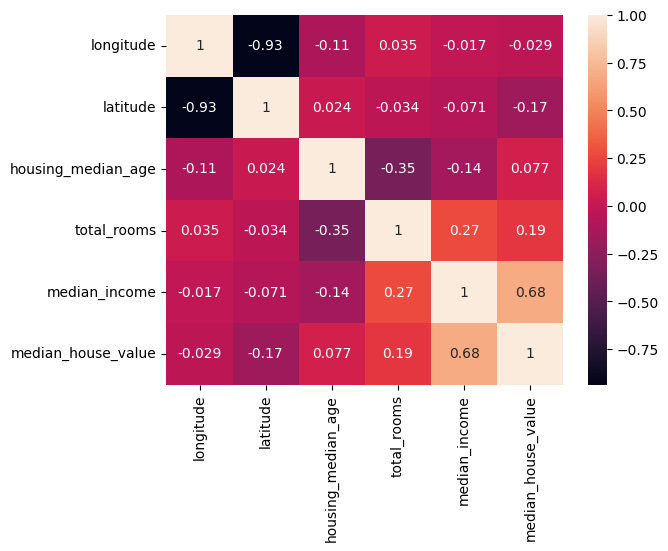

In [95]:
sns.heatmap(df_dropped.corr(), annot = True)
plt.show()

# Linear Regression (not regularized with Multi-Colinearity)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
lr_predicted = lr.predict(X_test)

In [105]:
lr_r2_score = r2_score(y_test,lr_predicted)
lr_mse = mean_squared_error(y_test,lr_predicted)
print("R2 score : %.2f" % lr_r2_score)
print("Mean squared error: %.2f" % lr_mse)
print( "actual=", y_test[20566], " observed=", lr_predicted[2])

R2 score : 0.66
Mean squared error: 0.34
actual= 0.18596896762202952  observed= -0.030134611474217372


# Lasso Regression (L1 regularization with Multi-Colinearity)

In [106]:
lasso_r = Lasso(alpha=0.01)
lasso_r.fit(X_train, y_train)

Lasso(alpha=0.01)

In [107]:
lasso_r_predicted = lasso_r.predict(X_test)

In [108]:
lasso_r_r2_score = r2_score(y_test,lasso_r_predicted)
lasso_r_mse = mean_squared_error(y_test,lasso_r_predicted)
print("R2 score : %.2f" % lasso_r_r2_score)
print("Mean squared error: %.2f" % lasso_r_mse)
print( "actual=", y_test[20566], " observed=", lasso_r_predicted[2])

R2 score : 0.56
Mean squared error: 0.43
actual= 0.18596896762202952  observed= 0.16014354475067608


# Ridge Regression (L2 regularization with Multi-Colinearity)

In [109]:
rr = Ridge(alpha = 0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [110]:
rr_predicted = rr.predict(X_test)

In [111]:
rr_r2_score = r2_score(y_test,rr_predicted)
rr_mse = mean_squared_error(y_test,rr_predicted)
print("R2 score : %.2f" % rr_r2_score)
print("Mean squared error: %.2f" % rr_mse)
print( "actual=", y_test[20566], " observed=", rr_predicted[2])

R2 score : 0.58
Mean squared error: 0.42
actual= 0.18596896762202952  observed= 0.11555743509300923


# ElasticNet Regression (L1 and L2 regularization with Multi-Colinearity)

In [112]:
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [113]:
en_predicted = en.predict(X_test)

In [114]:
en_r2_score = r2_score(y_test,en_predicted)
en_mse = mean_squared_error(y_test,en_predicted)
print("R2 score : %.2f" % en_r2_score)
print("Mean squared error: %.2f" % en_mse)
print( "actual=", y_test[20566], " observed=", en_predicted[2])

R2 score : 0.57
Mean squared error: 0.42
actual= 0.18596896762202952  observed= 0.144314190246527


In [115]:
list_results = [[lr_r2_score, lr_mse],[lasso_r_r2_score, lasso_r_mse],[rr_r2_score,rr_mse],[en_r2_score, en_mse]]

df_results = pd.DataFrame(list_results, columns = ['R2 score', 'MSE'])

In [116]:
df_results

,R2 score,MSE
0,0.656409,0.339001
1,0.564704,0.429480
2,0.576331,0.418008
3,0.569921,0.424333


# Result (Multi-Colinerity not fixed)

Based on results, we do not see any benefit of regularization of dataset, however GridSearch with optimization to be provided to get better overview, next task ...

Now let's scatter y_predicted and y_test to better see the results. 

In [117]:
y_test_reset = y_test.reset_index()
y_test_reset

,index,median_house_value
0,14740,-0.482772
1,10101,0.519579
2,20566,0.185969
3,2670,-1.525750
4,15709,1.750242
...,...,...
4123,6655,-0.113320
4124,3505,0.220462
4125,1919,-0.589099
4126,1450,0.653380


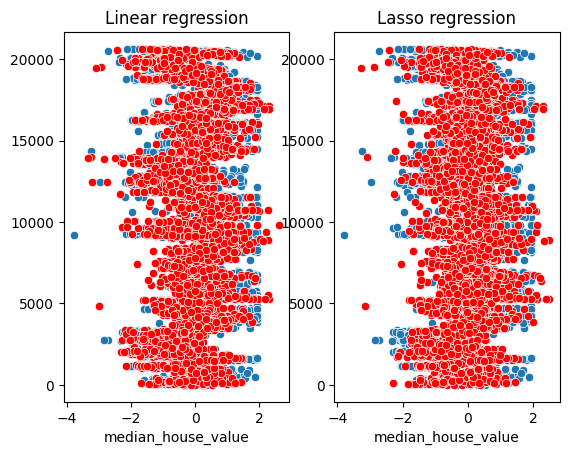

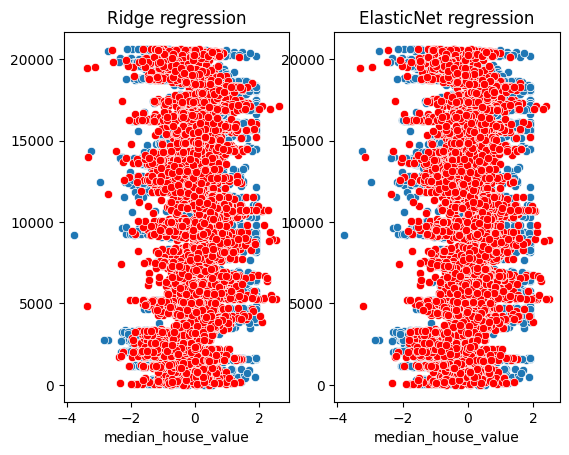

In [118]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig, (ax3, ax4) = plt.subplots(1,2)

sns.scatterplot(x = y_test, y = y_test.index , ax=ax1).set(title = "Linear regression")
sns.scatterplot(x = lr_predicted, y = y_test.index, color = 'r', ax=ax1)

sns.scatterplot(x = y_test, y = y_test.index, ax=ax2)
sns.scatterplot(x = lasso_r_predicted, y = y_test.index, color = 'r', ax=ax2).set(title = "Lasso regression")

sns.scatterplot(x = y_test, y = y_test.index, ax=ax3).set(title = 'Ridge regression')
sns.scatterplot(x = rr_predicted, y = y_test.index, color = 'r', ax=ax3)

sns.scatterplot(x = y_test, y = y_test.index, ax=ax4).set(title = 'ElasticNet regression')
sns.scatterplot(x = en_predicted, y = y_test.index, color = 'r', ax=ax4)

plt.show()

# Linear Regression (not regularized with fixed Multi-Colinearity)

In [97]:
lr_2 = LinearRegression()
lr_2.fit(X_train_d, y_train_d)

LinearRegression()

In [123]:
lr_2_predicted = lr_2.predict(X_test_d)

In [124]:
lr_2_r2_score = r2_score(y_test_d,lr_2_predicted)
lr_2_mse = mean_squared_error(y_test_d,lr_2_predicted)
print("R2 score : %.2f" % lr_2_r2_score)
print("Mean squared error: %.2f" % lr_2_mse)
print( "actual=", y_test_d[20566], " observed=", lr_2_predicted[2])

R2 score : 0.61
Mean squared error: 0.39
actual= 0.18596896762202952  observed= 0.0576441838561827


# Lasso Regression (L1 regularization with fixed Multi-Colinearity)

In [125]:
lasso_r_2 = Lasso(alpha=0.01)
lasso_r_2.fit(X_train_d, y_train_d)

Lasso(alpha=0.01)

In [126]:
lasso_r_2_predicted = lasso_r_2.predict(X_test_d)

In [127]:
lasso_r_2_r2_score = r2_score(y_test_d,lasso_r_2_predicted)
lasso_r_2_mse = mean_squared_error(y_test_d,lasso_r_2_predicted)
print("R2 score : %.2f" % lasso_r_2_r2_score)
print("Mean squared error: %.2f" % lasso_r_2_mse)
print( "actual=", y_test_d[20566], " observed=", lasso_r_2_predicted[2])

R2 score : 0.49
Mean squared error: 0.50
actual= 0.18596896762202952  observed= 0.22302838257651672


# Ridge Regression (L2 regularization with fixed Multi-Colinearity)

In [128]:
rr_2 = Ridge(alpha = 0.01)
rr_2.fit(X_train_d, y_train_d)

Ridge(alpha=0.01)

In [132]:
rr_2_predicted = rr_2.predict(X_test_d)

In [133]:
rr_2_r2_score = r2_score(y_test_d,rr_2_predicted)
rr_2_mse = mean_squared_error(y_test_d,rr_2_predicted)
print("R2 score : %.2f" % rr_2_r2_score)
print("Mean squared error: %.2f" % rr_2_mse)
print( "actual=", y_test_d[20566], " observed=", rr_2_predicted[2])

R2 score : 0.49
Mean squared error: 0.50
actual= 0.18596896762202952  observed= 0.222739252364732


# ElasticNet Regression (L1 and L2 regularization with fixed Multi-Colinearity)

In [134]:
en_2 = ElasticNet(alpha = 0.01)
en_2.fit(X_train_d, y_train_d)

ElasticNet(alpha=0.01)

In [137]:
en_2_predicted = en_2.predict(X_test_d)

In [138]:
en_2_r2_score = r2_score(y_test_d,en_2_predicted)
en_2_mse = mean_squared_error(y_test_d,en_2_predicted)
print("R2 score : %.2f" % en_2_r2_score)
print("Mean squared error: %.2f" % en_2_mse)
print( "actual=", y_test_d[20566], " observed=", en_2_predicted[2])

R2 score : 0.49
Mean squared error: 0.50
actual= 0.18596896762202952  observed= 0.2216509943367718


In [155]:
list_results_2 = [[lr_2_r2_score, lr_2_mse],[lasso_r_2_r2_score, lasso_r_2_mse],[rr_2_r2_score,rr_2_mse],[en_2_r2_score, en_2_mse]]

df_results_2 = pd.DataFrame(list_results_2, columns = ['R2 score', 'MSE'])

In [156]:
df_results_2

,R2 score,MSE
0,0.605444,0.389284
1,0.488362,0.504802
2,0.488966,0.504206
3,0.488826,0.504344


In [157]:
df_final = pd.concat((df_results, df_results_2), axis = 1)

In [158]:
df_final

,R2 score,MSE,R2 score,MSE
0,0.656409,0.339001,0.605444,0.389284
1,0.564704,0.429480,0.488362,0.504802
2,0.576331,0.418008,0.488966,0.504206
3,0.569921,0.424333,0.488826,0.504344


# FINAL RESULTS

We can see the results are worse than before for every model w/ or w/o regulazitation but with fixed Mulit-Colinearity. In fact we have different data after dropping some features which can be the cause. I would rather change the mulicolinear data into new feature then dropping and in overall decrease data coming into model.